## **聚类**

旨在将数据集中的样本分成若干个簇，使得同一个簇内的对象彼此相似，不同簇间的对象差异较大。聚类是一种无监督学习算法，不需要预先标记数据的标签，完全依赖数据本身内在结构和特征来进行分组，最终簇所对应的概念语义需由使用者来把握和命名

#### K-means聚类(K均值聚类)

K均值聚类（K-means）是基于样本集合划分的聚类方法，将样本集合划分为k个子集构成k个簇，将n个样本分到k个簇中，每个样本到其所属簇的中心的距离最小。每个样本只能属于一个簇，所以K均值聚类是硬聚类。

通过最小化损失函数来找到一个最优划分

使用欧氏距离的平方来作为样本间的距离
$$
d(x_i, x_j) = \|x_i - x_j\|^2
$$

损失函数

$$
W(C) = \sum_{l=1}^k \sum_{C(i)=l} \|x_i - \bar{x}_l\|^2
$$

K-means就是求解这个最优化问题

$$
C^* = \arg\min_C W(C) = \arg\min_C \sum_{l=1}^k \sum_{C(i)=l} \|x_i - \bar{x}_l\|^2
$$

工作流程

1. 随机选取K个样本点作为初始簇心
2. 对样本进行聚类, 计算每个样本到达簇心的距离, 将每个样本点分到最近的簇中
3. 计算聚类结果中每个簇中样本点的均值作为新的簇心
4. 重复过程, 直到收敛或者达到停止条件

K均值聚类需要事先指定簇个数k，而实际中最优的k值是不知道的，需要尝试使用不同的k值检验聚类结果质量，可以采用二分查找快速找到最优k值。聚类结果的质量可以用簇的平均直径来衡量，一般地，簇个数变小时平均直径会增加；簇个数变大超过某个值后平均直径会不变，而这个值正是最优的k值。

#### **K-means代码**

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [50]:
# 加载数据
X, y = make_blobs(n_samples=300, centers=3, cluster_std=2)

In [51]:
# 定义Kmeans
kmeans = KMeans(n_clusters=3)

In [52]:
# 训练模型
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [53]:
# 分类
y_pred = kmeans.predict(X)

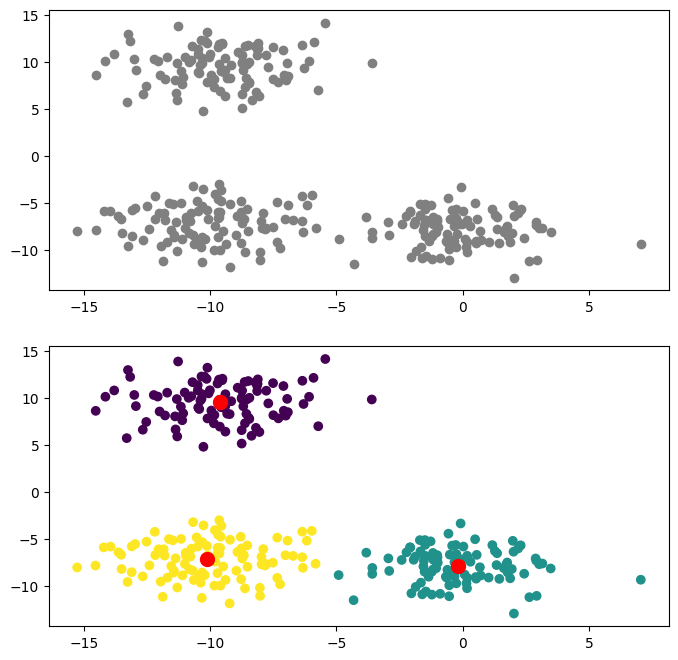

In [54]:
# 画出原始数据
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].scatter(X[:, 0], X[:, 1], c='gray')
# 画出Kmeans后数据
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred)
# 画出簇心
ax[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', s=100)
plt.show()

#### **聚类模型的评估**

1. 轮廓参数

$$
s_i = \frac{b_i - a_i}{\max(a_i, b_i)} \in [-1, 1]
$$

内聚度ai, 分离度bi, 轮廓参数越接近1越好

2. 簇内平方和

$$
WCSS = \sum_{k=1}^K \sum_{i \in C_k} \|x_i - \mu_k\|^2
$$

簇内每个样本点到达簇中心的距离平方和

3. 通过肘部法可以确定最佳的K值

肘部法用于确定最佳簇数K，在使用K-means时非常常见，它通过绘制簇数K和某个聚类质量指标（通常是簇内平方和）的关系曲线，找到一个拐点或“肘部”，即增加簇数带来的收益显著减少的点，这个点通常被认为是最佳的K值

In [55]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score   # 轮廓系数和CH指数


print(f"WCSS: {kmeans.inertia_:.4f}")
print(f"轮廓系数: {silhouette_score(X, y_pred):.4f}")
print(f"CH指数: {calinski_harabasz_score(X, y_pred):.4f}")

WCSS: 2277.3966
轮廓系数: 0.6982
CH指数: 1683.1060
